In [100]:
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
data = np.genfromtxt('/Users/surbhisingla/Desktop/berg1/recs2009_public.csv',delimiter=",",names=True)

In [23]:
data.shape

(12083,)

In [85]:
data1=data[data['Climate_Region_Pub']==1]
age_data=2015-data1['YEARMADE']
EUI_data=data1['TOTALBTU']/data1['TOTSQFT']    #Energy usage Intensity
ElecUI_data= data1['KWH']/data1['TOTSQFT']     #Electricity usage Intensity
age_data.shape

(3993,)

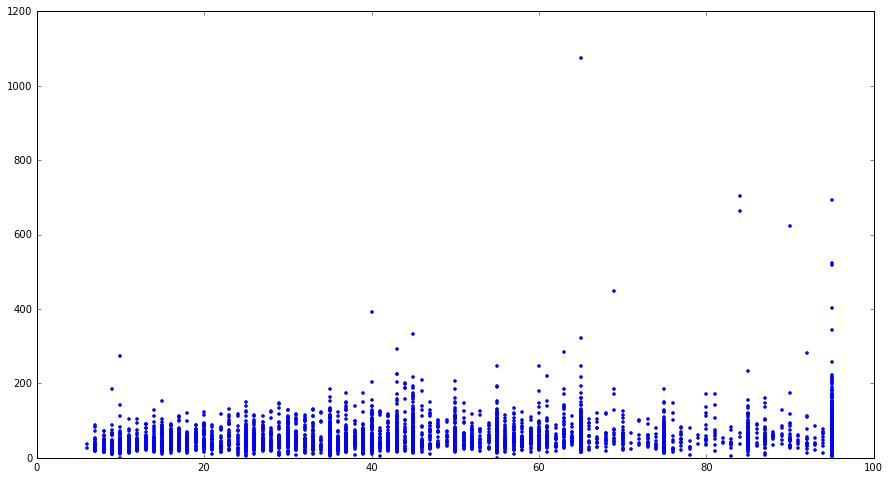

In [86]:
plt.figure(figsize=(15,8))
plt.plot(age_data,EUI_data,'.')

## Linear regression

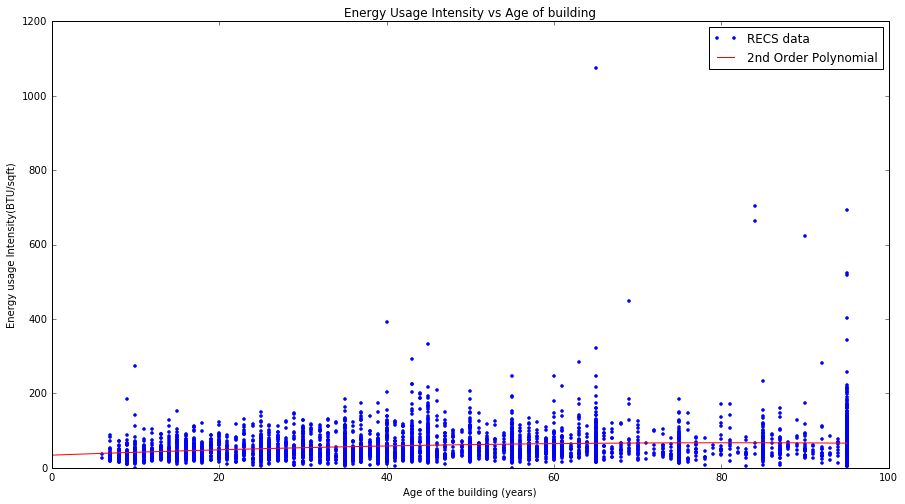

In [87]:
# fitting a 2nd order polynomial
po = np.polyfit(age_data,EUI_data, 2)

xpo = np.linspace(0,95,num=95)
plt.figure(figsize=(15,8))
plt.plot(age_data,EUI_data,'.', xp, np.polyval(po,xpo),'-r')
plt.xlabel('Age of the building (years)')
plt.ylabel('Energy usage Intensity(BTU/sqft)')
plt.title('Energy Usage Intensity vs Age of building')
plt.legend(('RECS data','2nd Order Polynomial'))

## LASSO

In [118]:
from sklearn import linear_model
Y=data['TOTALBTU']
x = np.vstack((data1['TEMPHOME'],data1['TEMPGONE'],data1['TEMPNITE'],data1['ACROOMS'],data1['WINDOWS'],data1['NHSLDMEM'],data1['TOTSQFT'],age_data,data1['STORIES'],data1['MONEYPY'],data1['HEATROOM'],data1['EQUIPAGE'],data1['NUMH2ONOTNK'],data1['NUMH2OHTRS'],data1['LGT4'])).T
clf = linear_model.Lasso(alpha=45000)
clf.fit(x,Y)
# Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=False, positive=False, precompute=False, random_state=None,
#    selection='cyclic', tol=0.0001, warm_start=False)
print(clf.coef_)
print(clf.intercept_)

[   0.           80.18667055    0.            0.          633.74024584
    0.           18.60369738  228.79345981    6.94659615    0.            0.
    0.            0.            0.            0.        ]
26763.2925976


## Validate

In [119]:
data2 = np.genfromtxt('/Users/surbhisingla/Downloads/RECS05alldata.csv',delimiter=",",names=True)

In [127]:
data2['YEARMADE'][2,]

4.0

In [144]:
#Climate region normailzation
data3=data2[data2['HD65']>4000]
data4=data3[data3['HD65']<13000]
data5=data4[data4['CD65']<1600]
age=np.zeros((len(data5),))

for i in range(len(data5)):
        if (data5['YEARMADE'][i,]==1):
            age[i,]= 75
        elif (data5['YEARMADE'][i,]==2):   
            age[i,]= 70
        elif (data5['YEARMADE'][i,]==3):
            age[i,]= 60
        elif (data5['YEARMADE'][i,]==4):
            age[i,]= 50
        elif (data5['YEARMADE'][i,]==5):
            age[i,]= 40
        elif (data5['YEARMADE'][i,]==6):
            age[i,]= 33
        elif (data5['YEARMADE'][i,]==7):
            age[i,]= 28
        elif (data5['YEARMADE'][i,]==8):
            age[i,]= 23
        elif (data5['YEARMADE'][i,]==9):
            age[i,]= 18
        elif (data5['YEARMADE'][i,]==10):
            age[i,]= 14
        elif (data5['YEARMADE'][i,]==11):
            age[i,]= 12
        elif (data5['YEARMADE'][i,]==12):
            age[i,]= 11
        else:
            age[i,]= 10
    
# age_data=2015-data1['YEARMADE']
# EUI_data=data1['TOTALBTU']/data1['TOTSQFT']    #Energy usage Intensity
# ElecUI_data= data1['KWH']/data1['TOTSQFT']     #Electricity usage Intensity
# age_data.shape
data5.shape

(2465,)

In [145]:
age

array([ 50.,  75.,  23., ...,  18.,  33.,  33.])

In [151]:
EUI=data5['BTUEL']/data5['TOTSQFT']

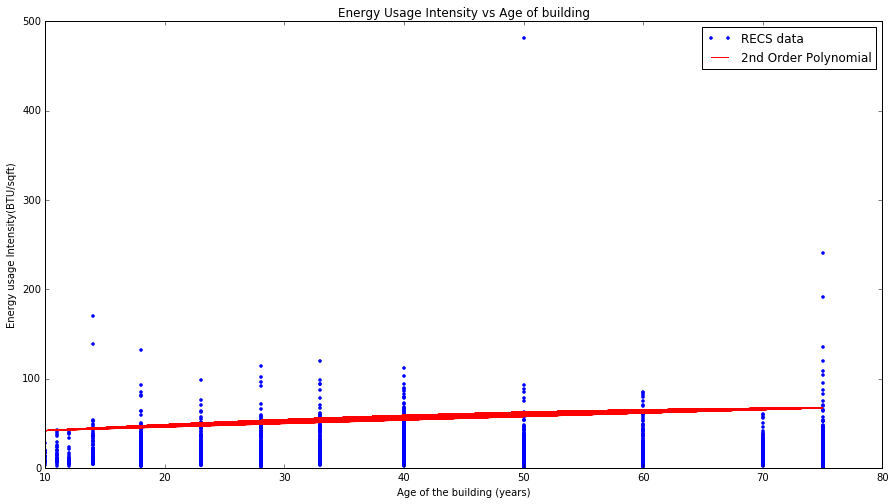

In [153]:
plt.figure(figsize=(15,8))
plt.plot(age,EUI,'.', age, np.polyval(po,age),'-r')
plt.xlabel('Age of the building (years)')
plt.ylabel('Energy usage Intensity(BTU/sqft)')
plt.title('Energy Usage Intensity vs Age of building')
plt.legend(('RECS data','2nd Order Polynomial'))